CSCE 5215 Asignment 4

Thai Ha Dang 11741833

# Question 1 

## Check for null values in the dataset if present remove them. Convert any categorical values to numerical values. Split the data into 70-30 training and testing. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# load data
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# data preprocessing
df = data.copy()
# check for missing values
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


we can see column contain categorical values are: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Now all the collumns are numerical values

In [8]:
# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
# Split data 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((642, 11), (276, 11), (642,), (276,))

## Train the data on Random Forest, Gradient Boosting, AdaBoost and XGBoost. Use n_estimators as 50 for all the models.

In [9]:
# Train Models: 
# Initialize models: Use 50 estimators for all models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

## Evaluate the models based on accuracy, F-1 score, precision and recall. Explain which model performs best and why. 

In [10]:
# Train and predict
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate Models (15 Points)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

c:\Users\hadan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)

# Explanation of best model
best_model = results_df['Accuracy'].idxmax()
print(f"\nBest Model: {best_model}")
print("Reasoning: The best model is determined by highest accuracy as it balances both classes well. However, if the dataset is imbalanced, F1-score might be more critical due to its consideration of both precision and recall.")


Model Performance:
                    Accuracy  F1-Score  Precision    Recall
Random Forest      0.894928  0.910769   0.919255  0.902439
Gradient Boosting  0.862319  0.879747   0.914474  0.847561
AdaBoost           0.873188  0.888179   0.932886  0.847561
XGBoost            0.847826  0.867089   0.901316  0.835366

Best Model: Random Forest
Reasoning: The best model is determined by highest accuracy as it balances both classes well. However, if the dataset is imbalanced, F1-score might be more critical due to its consideration of both precision and recall.


## Check for feature importance of all the models. Determine which features showcase more importance and which show least. 

In [12]:
# Feature Importance
def plot_feature_importance(name, model):
    importances = model.feature_importances_
    feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title(f'Feature Importance for {name}')
    plt.show()

def check_feature_importance(name, model):
    print(f"\nFeature Importance for {name}:")
    importances = model.feature_importances_
    feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print(feature_importance)
    print(f"Most Important: {feature_importance.index[0]}")
    print(f"Least Important: {feature_importance.index[-1]}")

# plot_feature_importance(models['Random Forest'], X_train, 'Random Forest')
# plot_feature_importance(models['Gradient Boosting'], X_train, 'Gradient Boosting')

# for name, model in models.items():
#     print(f"\nFeature Importance for {name}:")
#     importances = model.feature_importances_
#     feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
#     print(feature_importance)
#     print(f"Most Important: {feature_importance.index[0]}")
#     print(f"Least Important: {feature_importance.index[-1]}")

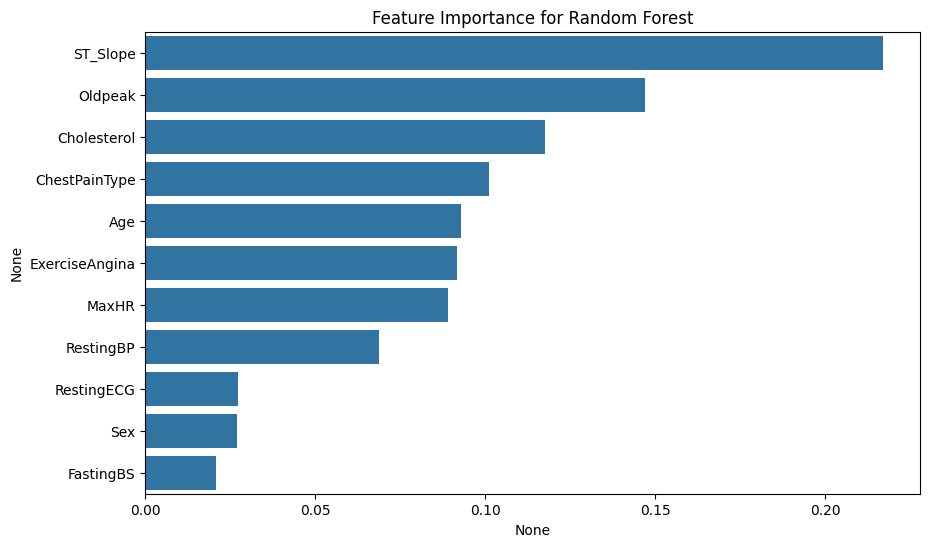


Feature Importance for Random Forest:
ST_Slope          0.217113
Oldpeak           0.146899
Cholesterol       0.117687
ChestPainType     0.101022
Age               0.092972
ExerciseAngina    0.091513
MaxHR             0.089152
RestingBP         0.068596
RestingECG        0.027285
Sex               0.026859
FastingBS         0.020902
dtype: float64
Most Important: ST_Slope
Least Important: FastingBS


In [13]:
# check the feature importance for Random Forest
plot_feature_importance('Random Forest', models['Random Forest'])
check_feature_importance('Random Forest', models['Random Forest'])


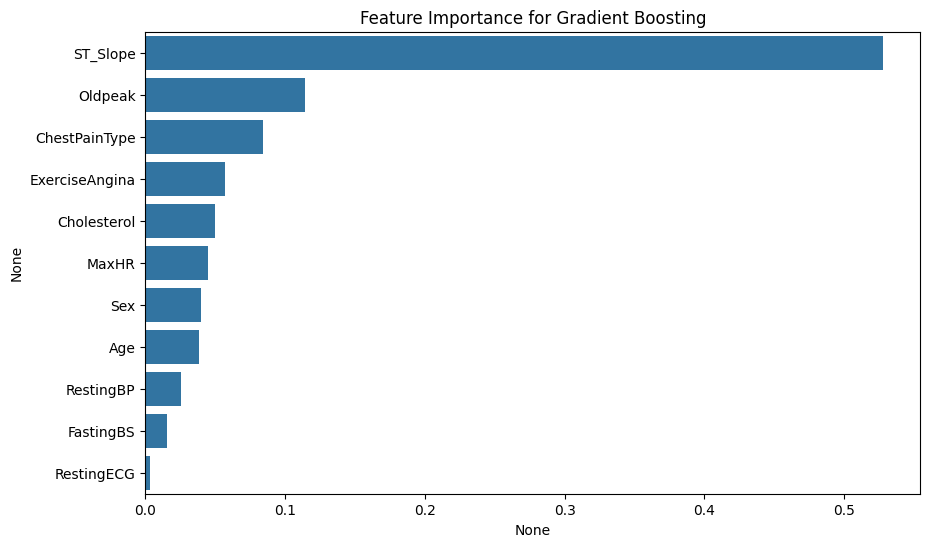


Feature Importance for Gradient Boosting:
ST_Slope          0.528095
Oldpeak           0.113850
ChestPainType     0.084139
ExerciseAngina    0.057288
Cholesterol       0.049679
MaxHR             0.044578
Sex               0.039448
Age               0.038293
RestingBP         0.025276
FastingBS         0.015787
RestingECG        0.003567
dtype: float64
Most Important: ST_Slope
Least Important: RestingECG


In [14]:
# check the feature importance for Gradient Boosting
plot_feature_importance('Gradient Boosting', models['Gradient Boosting'])
check_feature_importance('Gradient Boosting', models['Gradient Boosting'])


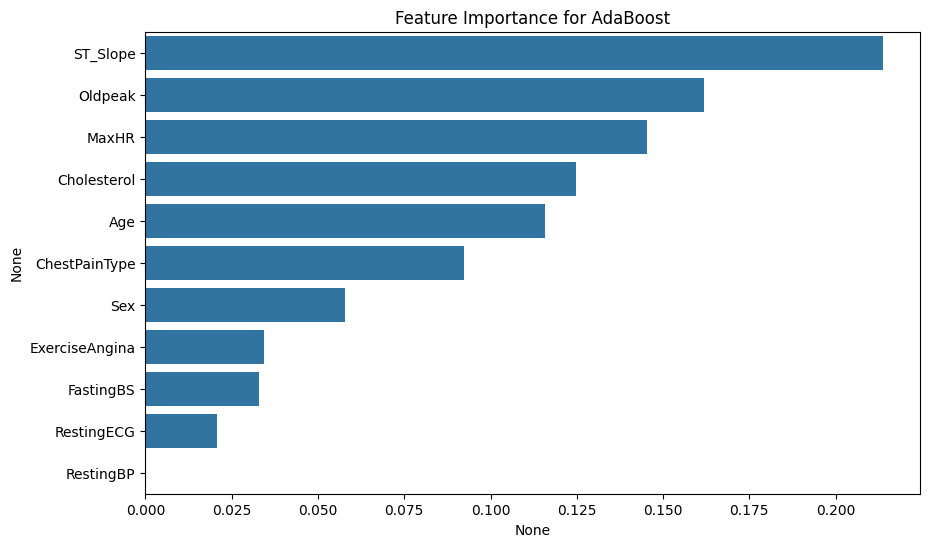


Feature Importance for AdaBoost:
ST_Slope          0.213863
Oldpeak           0.161866
MaxHR             0.145470
Cholesterol       0.124807
Age               0.115851
ChestPainType     0.092234
Sex               0.057847
ExerciseAngina    0.034454
FastingBS         0.032954
RestingECG        0.020654
RestingBP         0.000000
dtype: float64
Most Important: ST_Slope
Least Important: RestingBP


In [15]:
# check the feature importance for AdaBoost
plot_feature_importance('AdaBoost', models['AdaBoost'])
check_feature_importance('AdaBoost', models['AdaBoost'])

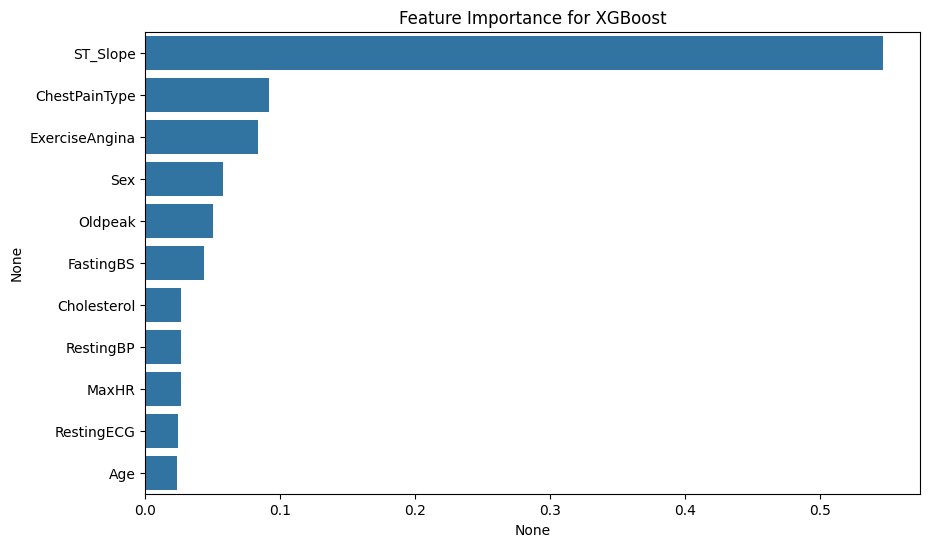


Feature Importance for XGBoost:
ST_Slope          0.546963
ChestPainType     0.091898
ExerciseAngina    0.083203
Sex               0.057753
Oldpeak           0.049837
FastingBS         0.043364
Cholesterol       0.026693
RestingBP         0.026360
MaxHR             0.026345
RestingECG        0.024321
Age               0.023263
dtype: float32
Most Important: ST_Slope
Least Important: Age


In [16]:
# check the feature importance for XGBoost
plot_feature_importance('XGBoost', models['XGBoost'])
check_feature_importance('XGBoost', models['XGBoost'])

# Question 2

Use the heart.csv dataset. Use the attributes Age, Sex, ChestPainType, RestingBP, RestingECG and ExerciseAngina only. Compare the performances of models below:

## Check for null values in the dataset if present remove them. Convert any categorical values to numerical values. Split the data into 60-40 training and testing. 

In [17]:
df = data.copy()

In [18]:
# Data Preprocessing
# Select specified columns
selected_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'RestingECG', 'ExerciseAngina', 'HeartDisease']
df = df[selected_cols]
df.head()

,Age,Sex,ChestPainType,RestingBP,RestingECG,ExerciseAngina,HeartDisease
0,40,M,ATA,140,Normal,N,0
1,49,F,NAP,160,Normal,N,1
2,37,M,ATA,130,ST,N,0
3,48,F,ASY,138,Normal,Y,1
4,54,M,NAP,150,Normal,N,0


In [19]:
# Check for null values
print("Null values:\n", df.isnull().sum())
df = df.dropna()

Null values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
RestingECG        0
ExerciseAngina    0
HeartDisease      0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   RestingECG      918 non-null    object
 5   ExerciseAngina  918 non-null    object
 6   HeartDisease    918 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 50.3+ KB


We can see the collumns that contain categorical values is ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

In [21]:
# Convert categorical to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Sex,ChestPainType,RestingBP,RestingECG,ExerciseAngina,HeartDisease
0,40,1,1,140,1,0,0
1,49,0,2,160,1,0,1
2,37,1,1,130,2,0,0
3,48,0,0,138,1,1,1
4,54,1,2,150,1,0,0


In [22]:
# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split data 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Train the data on KNN, Decision Trees and Logistic regression individually

In [23]:
# Train Individual Models
# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [24]:
# Train and predict individual models
individual_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate Models
    individual_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

In [25]:
# Display individual model results
individual_results_df = pd.DataFrame(individual_results).T
print("\nIndividual Model Performance:\n", individual_results_df)



Individual Model Performance:
                      Accuracy  F1-Score  Precision    Recall
KNN                  0.663043  0.696078   0.759358  0.642534
Decision Tree        0.698370  0.727273   0.795699  0.669683
Logistic Regression  0.788043  0.809756   0.878307  0.751131


## Train the data on stacking model (Final estimator as logistic regression) and voting classifier (voting type hard) based on the above three models.

In [26]:
# Train Stacking and Voting Models
estimators = [(name, model) for name, model in models.items()]

# Stacking
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

# Voting
voting_model = VotingClassifier(estimators=estimators, voting='hard')
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)

In [27]:
# Evaluate ensemble models
ensemble_results = {
    'Stacking': {
        'Accuracy': accuracy_score(y_test, stacking_pred),
        'F1-Score': f1_score(y_test, stacking_pred),
        'Precision': precision_score(y_test, stacking_pred),
        'Recall': recall_score(y_test, stacking_pred)
    },
    'Voting': {
        'Accuracy': accuracy_score(y_test, voting_pred),
        'F1-Score': f1_score(y_test, voting_pred),
        'Precision': precision_score(y_test, voting_pred),
        'Recall': recall_score(y_test, voting_pred)
    }
}

In [28]:
# Display ensemble model results
ensemble_results_df = pd.DataFrame(ensemble_results).T
print("\nEnsemble Model Performance:\n", ensemble_results_df)


Ensemble Model Performance:
           Accuracy  F1-Score  Precision    Recall
Stacking  0.777174  0.802885   0.856410  0.755656
Voting    0.750000  0.770000   0.860335  0.696833


## Evaluate the models based on accuracy, F-1 score, precision and recall. Explain which model performs best and why. 

In [29]:
# Display results
print("\nIndividual Model Performance:\n", pd.DataFrame(individual_results).T)
print("\nEnsemble Model Performance:\n", pd.DataFrame(ensemble_results).T)

# Best model explanation
all_results = {**individual_results, **ensemble_results}
best_model = pd.DataFrame(all_results).T['Accuracy'].idxmax()
print(f"\nBest Model: {best_model}")
print("Reasoning: The best model is chosen based on highest accuracy, but F1-score might be more relevant if classes are imbalanced.")


Individual Model Performance:
                      Accuracy  F1-Score  Precision    Recall
KNN                  0.663043  0.696078   0.759358  0.642534
Decision Tree        0.698370  0.727273   0.795699  0.669683
Logistic Regression  0.788043  0.809756   0.878307  0.751131

Ensemble Model Performance:
           Accuracy  F1-Score  Precision    Recall
Stacking  0.777174  0.802885   0.856410  0.755656
Voting    0.750000  0.770000   0.860335  0.696833

Best Model: Logistic Regression
Reasoning: The best model is chosen based on highest accuracy, but F1-score might be more relevant if classes are imbalanced.


## Discuss whether stacking improves the predictive accuracy compared to individual models. 

In [30]:
# Stacking Improvement Discussion
stacking_acc = ensemble_results['Stacking']['Accuracy']
individual_acc = pd.DataFrame(individual_results).T['Accuracy']
print("\nStacking vs Individual Models:")
print(f"Stacking Accuracy: {stacking_acc}")
print(f"Individual Accuracies:\n{individual_acc}")
if stacking_acc > individual_acc.max():
    print("Stacking improves predictive accuracy by combining strengths of individual models.")
else:
    print("Stacking does not improve accuracy over the best individual model, possibly due to model similarity or data complexity.")


Stacking vs Individual Models:
Stacking Accuracy: 0.7771739130434783
Individual Accuracies:
KNN                    0.663043
Decision Tree          0.698370
Logistic Regression    0.788043
Name: Accuracy, dtype: float64
Stacking does not improve accuracy over the best individual model, possibly due to model similarity or data complexity.
